### NOTEBOOK DESCRIPTION:

This notebook does the axis projection based on age and gender axis as well as a validation technique based on the generated axis

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


scriptpath = "/home/jouven/youtube_projects/"
sys.path.append(os.path.abspath(scriptpath))

from helpers.helpers_channels_more_300 import *
from helpers.helpers_channel_embedding import *
from helpers.helpers_visualization_axis_projection import *

### Selected parameters for the axis projection

In [2]:
# Number of neirest neighbors taken
k = 10

# Selected number of pairs to create the axis
nb_selected_pairs = 7

### Useful functions

In [3]:
PATH = '/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/channel_sampling_then_permutation/CONTEXT_True_20_SUBSAMPLING_False_0.0043_LR_0.005/models/embedding0.csv.gz'

In [4]:
dict_channel_ind, dict_ind_channel, channels_id = filtered_channels_index_id_mapping()

## Finding cultural axis for our channel embedding

In [5]:
selected_channels = []
for channel in channels_id:
    selected_channels.append(dict_channel_ind[channel])

In [6]:
channelcrawler_projection = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
# Select the rows being in the select channels
channelcrawler_projection = channelcrawler_projection[channelcrawler_projection['channel'].apply(lambda row: row in channels_id)]

In [7]:
channelcrawler_projection.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


### Gender axis: men vs women

In [8]:
# Here you will find everything about: Men's Fashion, Hairstyle, Fitness & Health, Personal Vlogs and Tech.
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Alex Costa']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
2519,Howto & Style,2011-09-29,UCZyCposXwcyopaACep44maQ,Alex Costa,2120000,543,5370.0,2.417


In [9]:
# vlog channel about make up, hair transformation, rings selections, ...
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Shaaanxo']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
1737,Howto & Style,2009-01-18,UCMpOz2KEfkSdd5JeIJh_fxw,Shaaanxo,3215340,1422,3566.0,2.278


In [10]:
gender_seed = (dict_channel_ind['UCMpOz2KEfkSdd5JeIJh_fxw'], dict_channel_ind['UCZyCposXwcyopaACep44maQ'])

gender_axis, df_gender_axis = compute_axis_vector_based_on_seed(PATH, k, gender_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)


In [11]:
df_gender_axis

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
1325,People & Blogs,2012-06-03,UCGX1Z6DakWkBqS2xbmMF0yA,Jeamileth Doll,3590000,1042,2642.0,2.2125
108,Music,2014-06-09,UCmBA_wu8xGg1OfOkfW13Q0Q,Bad Bunny,19500000,33,168.0,2.0870
668,People & Blogs,2006-05-07,UCey_c7U86mJGz1VJWH5CYPA,iJustine,6110000,1826,1206.0,2.0870
1243,Science & Technology,2007-08-05,UCXGgrKt94gR6lmN4aN3mYTg,Austin Evans,3880000,1585,2464.0,2.1915
7621,Howto & Style,2009-01-19,UC15Do9RclIFswko5GfhMSaA,KlairedelysArt,905000,504,19115.0,2.8785
1693,Howto & Style,2006-11-04,UCno-YPZ8BiLrN0Wbl8qICFA,markcrilley,3020000,740,3461.0,2.2920
9794,People & Blogs,2013-09-15,UCs1uwp7bB1J_3r5xN2ioL_w,High Carb Hannah,683000,330,25520.0,2.9895
14438,Entertainment,2015-09-03,UCpyhJZhJQWKDdJCR07jPY-Q,Simnett Nutrition,341000,302,40079.0,3.3235
5359,Howto & Style,2012-01-05,UCDGdRHdLtV7VS_nWg9C2RVA,Anne Clutz,1150000,698,12757.0,2.7115
746,People & Blogs,2017-07-18,UC6N-9Wh0DYhDI8sQS7jwjVA,Ms Alex Gonzaga,4370000,103,1390.0,2.0870


### Age axis: kids vs adult

In [12]:
# Animation for kids
channelcrawler_projection[channelcrawler_projection['name_cc'] == "Magpiepony"]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
8280,Film and Animation,2013-12-17,UCISF5OGuAtSLNF24TKTnXag,Magpiepony,736000,304,21120.0,2.9225


In [13]:
# Channel analysing the films
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Beyond The Trailer']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
7841,Entertainment,2008-11-03,UCAXR2zenCwvRIyQd9ydtfaA,Beyond The Trailer,853000,5064,19744.0,2.8635


In [14]:
age_seed = (dict_channel_ind['UCISF5OGuAtSLNF24TKTnXag'], dict_channel_ind['UCAXR2zenCwvRIyQd9ydtfaA'])

age_axis, df_output_age = compute_axis_vector_based_on_seed(PATH, k, age_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)

In [15]:
df_output_age

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
1944,Film and Animation,2012-08-19,UC1AEadAUKi6Zt-G3PatrU-Q,Letupita725HD★,2698245,2115,4054.0,2.3350
115,Music,2010-05-20,UCgwv23FVv3lqh567yagXfNg,DisneyMusicVEVO,15600000,949,177.0,2.0870
647,Music,2016-06-09,UCvR2R7j218tzejtTsb_X6Rw,DopeLyrics,5810000,905,1153.0,2.0870
9,Music,2006-08-08,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,42000000,154,17.0,2.0870
11612,Gaming,2016-08-02,UC_HBvd4H4_oW9m_q_JjCzhQ,Gameplay - Android /...,499000,2277,30997.0,3.0640
1354,Gaming,2007-02-08,UCg_j7kndWLFZEg4yCqUWPCA,packattack04082,3680000,7433,2689.0,2.2160
5068,Entertainment,2016-03-21,UCkuzHfsi228Voj0rSeMOnKw,Kiwi Show,1070000,423,11943.0,2.6960
475,Science & Technology,2016-08-24,UCatfiM69M9ZnNhOzy0jZ41A,Power Vision,6630000,963,815.0,2.0870
520,Film and Animation,2014-02-17,UCGwu0nbY2wSkW8N-cghnLpA,Jaiden Animations,6730000,87,906.0,2.0870
443,Film and Animation,2014-05-12,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,7890000,202,749.0,2.0870


## Validation of the created axis

In [16]:
EMBEDDING = get_dataframe_in_embedding_space(PATH)

In [17]:
# Channels having more than 500'000 subscribers are selected to create the axis.
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_more_500k_subs.pkl",'rb') as f:
     selected_channels_id = set(pickle.load(f))
f.close()

selected_channels = []
for channel in selected_channels_id:
    selected_channels.append(dict_channel_ind[channel])

In [18]:
# Select the rows being in the select channels (english channels)
channelcrawler = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
channelcrawler = channelcrawler[channelcrawler['channel'].apply(lambda row: row in channels_id)]

In [19]:
dict_idx_name, dict_name_idx = channel_to_name(channelcrawler, dict_channel_ind)

#### 1. Projection of the gender axis

In [20]:
df_gender_projection = create_projection(EMBEDDING, gender_axis, dict_idx_name)

In [21]:
# Inverse the signs for color matiching ...
df_gender_projection['projection'] = -df_gender_projection['projection']

In [22]:
df_gender_projection.head()

,name,projection
0,Winded Voyage Sailin...,-0.996996
1,The Night Fury,-0.554030
2,Red Bull Surfing,0.845113
3,Heidi Joubert,-0.966660
4,MR JC,-0.385903


In [23]:
seed_gender_name = ('Alex Costa', 'Shaaanxo')

No handles with labels found to put in legend.


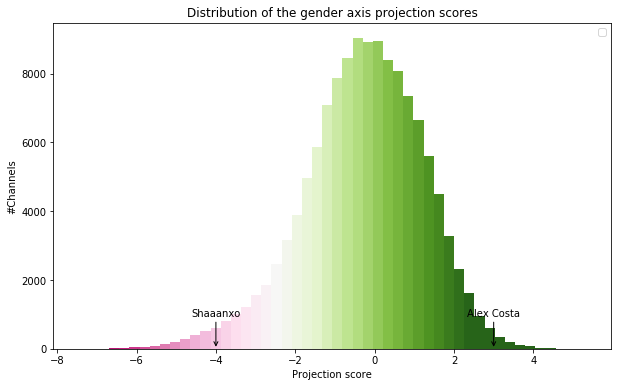

In [24]:
visualization(df_gender_projection, seed_gender_name, 'PiYG', 38, 'Distribution of the gender axis projection scores')

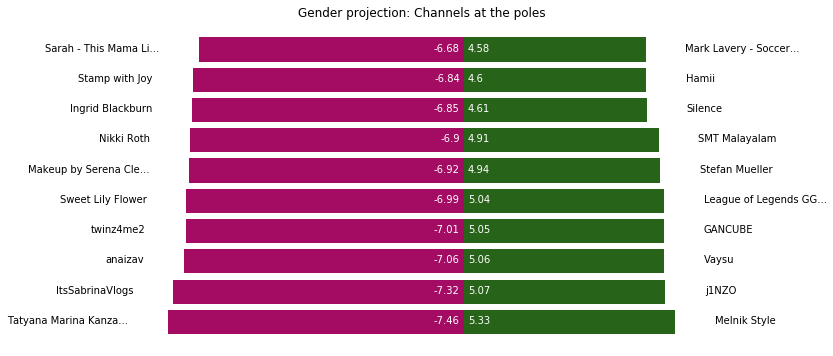

In [25]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

df_left  = df_gender_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_gender_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the poles", (10, 6), cm)

In the plot above, negative projection value should correspond to men channel whereas positive projection value should correspond to women channel.

In [26]:
'''
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_gender_projection['projection'].gt(0)
df_left  = df_gender_projection[~mask]
df_left  = df_left.iloc[random.sample(list(np.arange(len(df_left))), selected_pairs)].sort_values(by = ['projection'])
df_right = df_gender_projection[mask]
df_right = df_right.iloc[random.sample(list(np.arange(len(df_right))), selected_pairs)].sort_values(by = ['projection'], ascending = False)
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels taken at random", (7, 6))
'''

'\ncolor = \'PiYG\'\ncm = plt.cm.get_cmap(color)\nselected_pairs = 10\n\nmask     = df_gender_projection[\'projection\'].gt(0)\ndf_left  = df_gender_projection[~mask]\ndf_left  = df_left.iloc[random.sample(list(np.arange(len(df_left))), selected_pairs)].sort_values(by = [\'projection\'])\ndf_right = df_gender_projection[mask]\ndf_right = df_right.iloc[random.sample(list(np.arange(len(df_right))), selected_pairs)].sort_values(by = [\'projection\'], ascending = False)\ncreate_plot(df_left, df_right, selected_pairs, "Gender projection: Channels taken at random", (7, 6))\n'

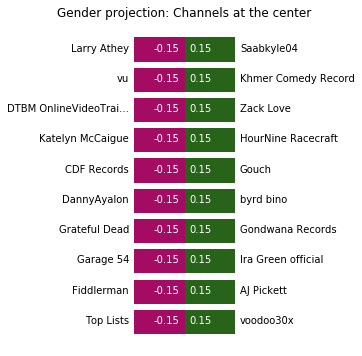

In [27]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_gender_projection['projection'].gt(-0.15)
df_left  = df_gender_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_gender_projection['projection'].gt(0.15)
df_right = df_gender_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the center", (2, 6), cm, 7)

In [28]:
df_gender_projection[df_gender_projection['name'] == "MattDoesFitness"]

,name,projection
86588,MattDoesFitness,-0.093526


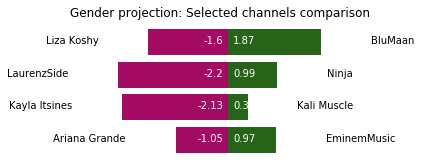

In [29]:
df_right = pd.DataFrame()
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'EminemMusic'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Kali Muscle'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Ninja'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'BluMaan'])

df_left = pd.DataFrame()
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Ariana Grande'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Kayla Itsines'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'LaurenzSide'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Liza Koshy'])

color = 'PiYG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, 4, "Gender projection: Selected channels comparison", (4, 2.5), cm)


Select reknown girl or men like channels and validate if these channels are indeed correctly classified.
- first line: fashion channels
- second line: gaming channels
- third line: fitness channels
- fourth line: music channels

#### 2. Projection on the age axis

Channels having a negative projections score should correspond to adult channels, positive projections score should correspond to kids channels

In [30]:
df_age_projection = create_projection(EMBEDDING, age_axis, dict_idx_name)
df_age_projection.head()

,name,projection
0,Winded Voyage Sailin...,-3.390299
1,The Night Fury,0.545687
2,Red Bull Surfing,-2.325388
3,Heidi Joubert,-0.957273
4,MR JC,1.650045


No handles with labels found to put in legend.


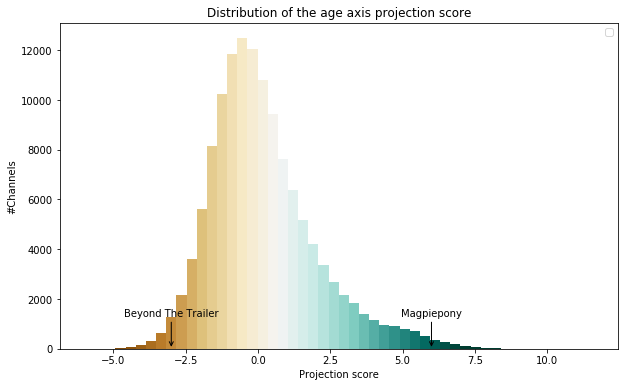

In [31]:
age_seed_name = ("Magpiepony", 'Beyond The Trailer')
visualization(df_age_projection, age_seed_name, 'BrBG', 37, 'Distribution of the age axis projection score')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12308 missing from current font.
  font.set_text(s, 0, flags=flags)


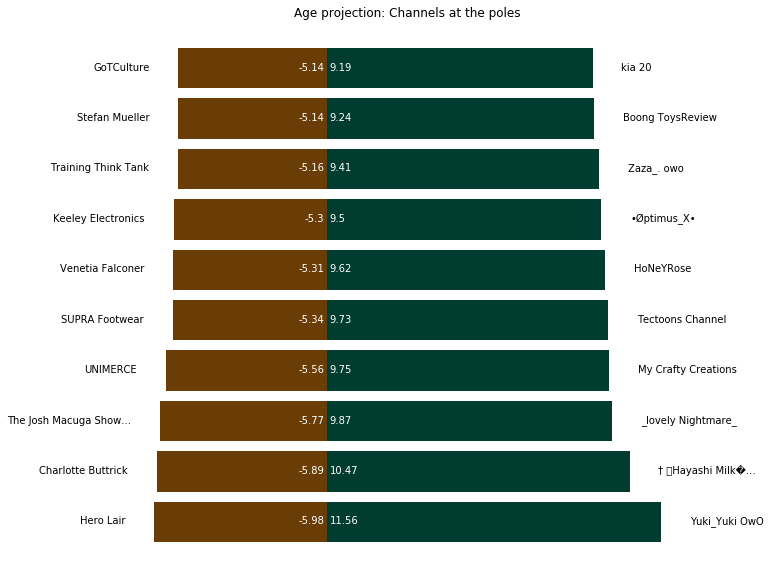

In [32]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

df_left  = df_age_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_age_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Age projection: Channels at the poles", (10, 10), cm)

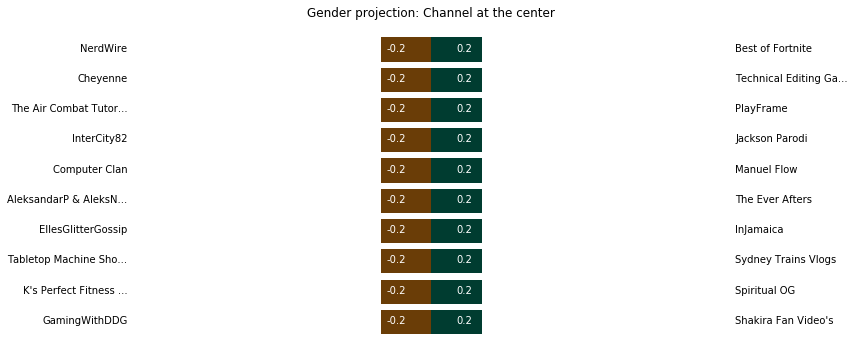

In [33]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_age_projection['projection'].gt(-0.2)
df_left  = df_age_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_age_projection['projection'].gt(0.2)
df_right = df_age_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channel at the center", (2, 6), cm, 1)

In [39]:
df_age_projection[df_age_projection['name'] == "Blippi"]

,name,projection
12911,Blippi,1.651742


In [40]:
df_age_projection[df_age_projection['name'] == "Kids TV - Nursery Rh..."]

,name,projection
16965,Kids TV - Nursery Rh...,2.94665


In [41]:
df_age_projection[df_age_projection['name'] == "Action Movie Kids"]

,name,projection
7498,Action Movie Kids,0.823731


In [42]:
df_age_projection[df_age_projection['name'] == "Kids Games Tv"]

,name,projection
114414,Kids Games Tv,4.636683


In [43]:
df_age_projection[df_age_projection['name'] == "Classical Tunes"]

,name,projection
120415,Classical Tunes,1.008999


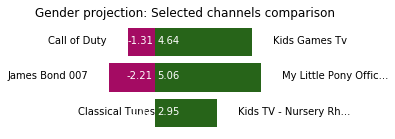

In [44]:
df_left = pd.DataFrame()
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'Classical Tunes'])
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'James Bond 007'])
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'Call of Duty'])

df_right = pd.DataFrame()
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'Kids TV - Nursery Rh...'])
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'My Little Pony Offic...'])
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'Kids Games Tv'])

color = 'BrBG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, 3, "Gender projection: Selected channels comparison", (3, 2), cm)
